# MARKET DATA FOR INTERST RATES

#### Class 3

#### Import Libaries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

#### US Treasury Rates

In [13]:
USTreasuryData = pd.read_csv("https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/2024/all?type=daily_treasury_yield_curve&field_tdr_date_value=2024&page&_format=csv",index_col="Date")
USTreasuryData.index = pd.to_datetime(USTreasuryData.index)
USTreasuryData

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2024-12-31,4.40,4.39,4.37,4.32,4.24,4.16,4.25,4.27,4.38,4.48,4.58,4.86,4.78
2024-12-30,4.43,4.42,4.37,4.33,4.25,4.17,4.24,4.29,4.37,4.46,4.55,4.84,4.77
2024-12-27,4.44,4.43,4.31,4.35,4.29,4.20,4.31,4.36,4.45,4.53,4.62,4.89,4.82
2024-12-26,4.45,4.45,4.35,4.37,4.31,4.23,4.30,4.35,4.42,4.49,4.58,4.83,4.76
2024-12-24,4.44,4.44,4.40,4.38,4.30,4.24,4.29,4.36,4.43,4.52,4.59,4.84,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-08,5.54,5.48,5.49,5.39,5.24,4.82,4.36,4.11,3.97,3.99,4.01,4.33,4.17
2024-01-05,5.54,5.48,5.47,5.41,5.24,4.84,4.40,4.17,4.02,4.04,4.05,4.37,4.21
2024-01-04,5.56,5.48,5.48,5.41,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13


## Module

In [30]:
class InterestRates:

    def __init__(self,Y):
        self.Y = Y

    def USTreasury(self,ratesCurve = False, COBDate = None):
        USTreasuryData = pd.read_csv(f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/{self.Y}/all?type=daily_treasury_yield_curve&field_tdr_date_value={self.Y}&page&_format=csv",index_col="Date")
        USTreasuryData.index = pd.to_datetime(USTreasuryData.index)
        if ratesCurve == True:
            if ratesCurve == None:
                return USTreasuryData[USTreasuryData.index == USTreasuryData.index.max()]
            else:
                return USTreasuryData[USTreasuryData.index == COBDate]
        else:
            return USTreasuryData

### 1. Normal Yield Curve

In [72]:
USTreasuryCurve = InterestRates(Y=2022).USTreasury(ratesCurve=True, COBDate=pd.to_datetime("2022-01-03"))
USTreasuryCurve

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,NaN,0.22,0.4,0.78,1.04,1.37,1.55,1.63,2.05,2.01


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

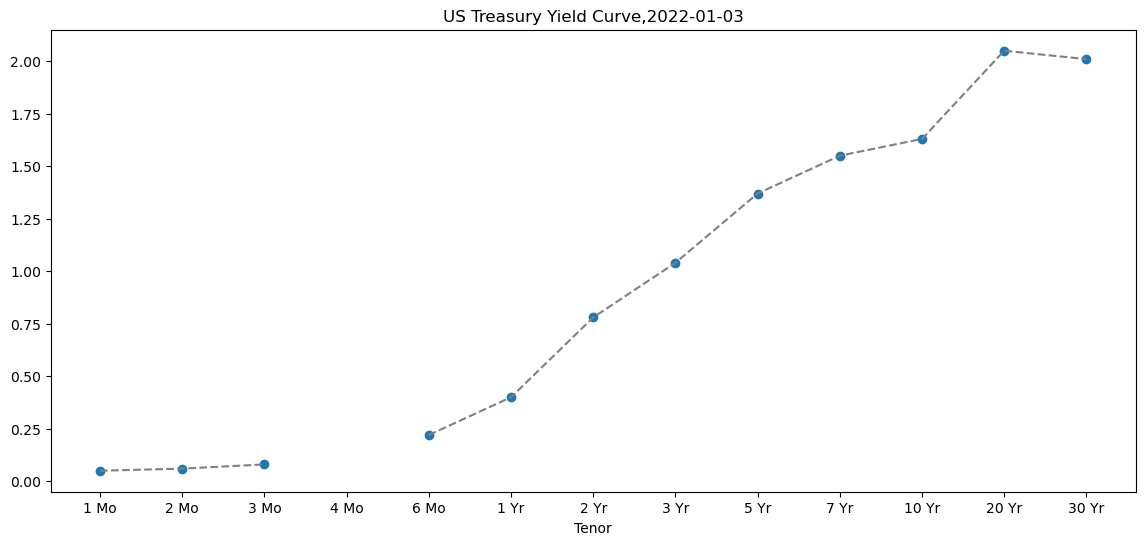

In [74]:
plt.figure(figsize=(14,6))
plt.scatter(x=USTreasuryCurve.transpose().index, y=USTreasuryCurve.transpose().values)
plt.plot(USTreasuryCurve.transpose(), color='grey', linestyle='--')

plt.title(f"US Treasury Yield Curve,{USTreasuryCurve.index[0].date()}")
plt.xlabel('Tenor')
plt.ylabel('Intrest Rate (%)')
plt.show()

### 2. Inverted Yield Curve

In [76]:
USTreasuryCurve = InterestRates(Y=2023).USTreasury(ratesCurve=True, COBDate=pd.to_datetime("2023-06-01"))
USTreasuryCurve

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2023-06-01,5.3,5.39,5.5,5.5,5.44,5.11,4.33,3.98,3.7,3.66,3.61,3.98,3.84


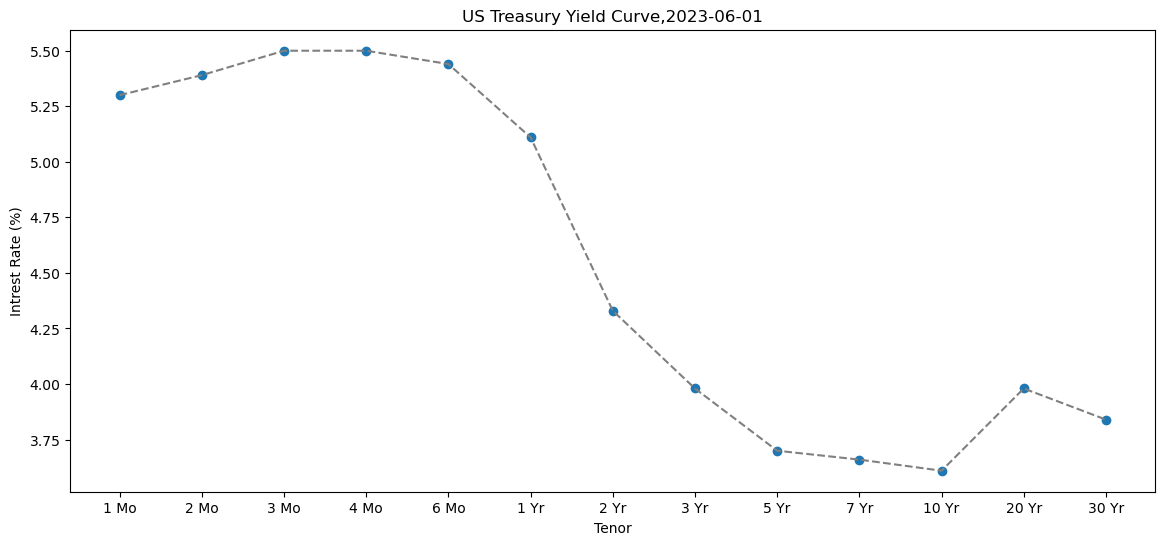

In [78]:
plt.figure(figsize=(14,6))
plt.scatter(x=USTreasuryCurve.transpose().index, y=USTreasuryCurve.transpose().values)
plt.plot(USTreasuryCurve.transpose(), color='grey', linestyle='--')

plt.title(f"US Treasury Yield Curve,{USTreasuryCurve.index[0].date()}")
plt.xlabel('Tenor')
plt.ylabel('Intrest Rate (%)')
plt.show()

### 3. Humped Yield Curve

In [88]:
USTreasuryCurve = InterestRates(Y=2022).USTreasury(ratesCurve=True, COBDate=pd.to_datetime("2022-12-30"))
USTreasuryCurve

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2022-12-30,4.12,4.41,4.42,4.69,4.76,4.73,4.41,4.22,3.99,3.96,3.88,4.14,3.97


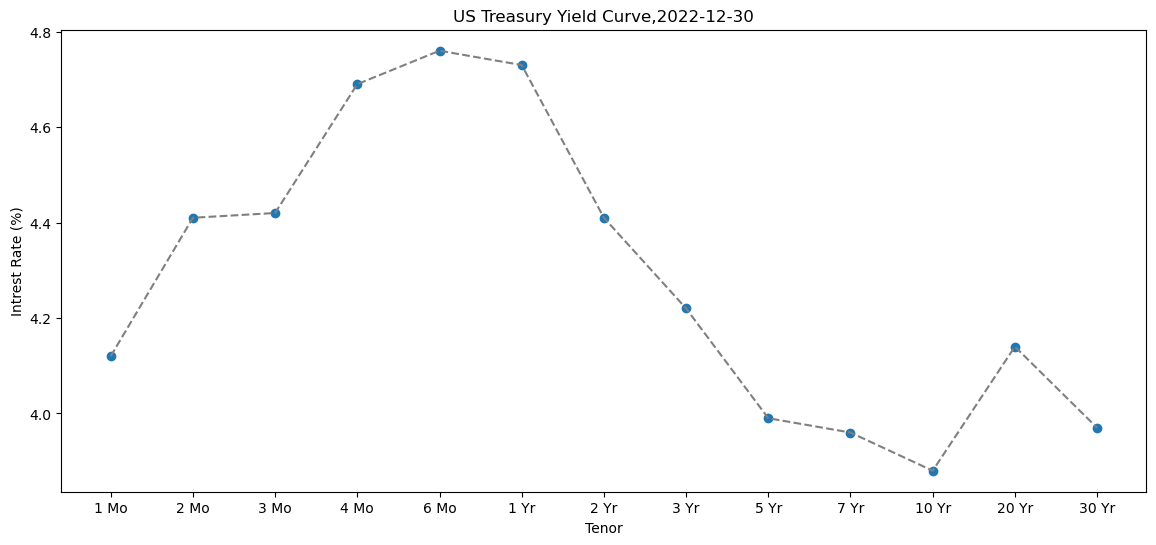

In [97]:
plt.figure(figsize=(14,6))
plt.scatter(x=USTreasuryCurve.transpose().index, y=USTreasuryCurve.transpose().values)
plt.plot(USTreasuryCurve.transpose(), color='grey', linestyle='--')

plt.title(f"US Treasury Yield Curve,{USTreasuryCurve.index[0].date()}")
plt.xlabel('Tenor')
plt.ylabel('Intrest Rate (%)')
plt.show()

### Histroyical Time-Siries Data

In [93]:
USTreasuryData = InterestRates(Y=2023).USTreasury()
USTreasuryData

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2023-12-29,5.60,5.59,5.40,5.41,5.26,4.79,4.23,4.01,3.84,3.88,3.88,4.20,4.03
2023-12-28,5.57,5.55,5.45,5.42,5.28,4.82,4.26,4.02,3.83,3.84,3.84,4.14,3.98
2023-12-27,5.55,5.53,5.44,5.42,5.26,4.79,4.20,3.97,3.78,3.81,3.79,4.10,3.95
2023-12-26,5.53,5.52,5.45,5.44,5.28,4.83,4.26,4.05,3.89,3.91,3.89,4.20,4.04
2023-12-22,5.54,5.52,5.44,5.45,5.31,4.82,4.31,4.04,3.87,3.92,3.90,4.21,4.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09,4.37,4.58,4.70,4.74,4.83,4.69,4.19,3.93,3.66,3.60,3.53,3.83,3.66
2023-01-06,4.32,4.55,4.67,4.74,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
2023-01-05,4.30,4.55,4.66,4.75,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78


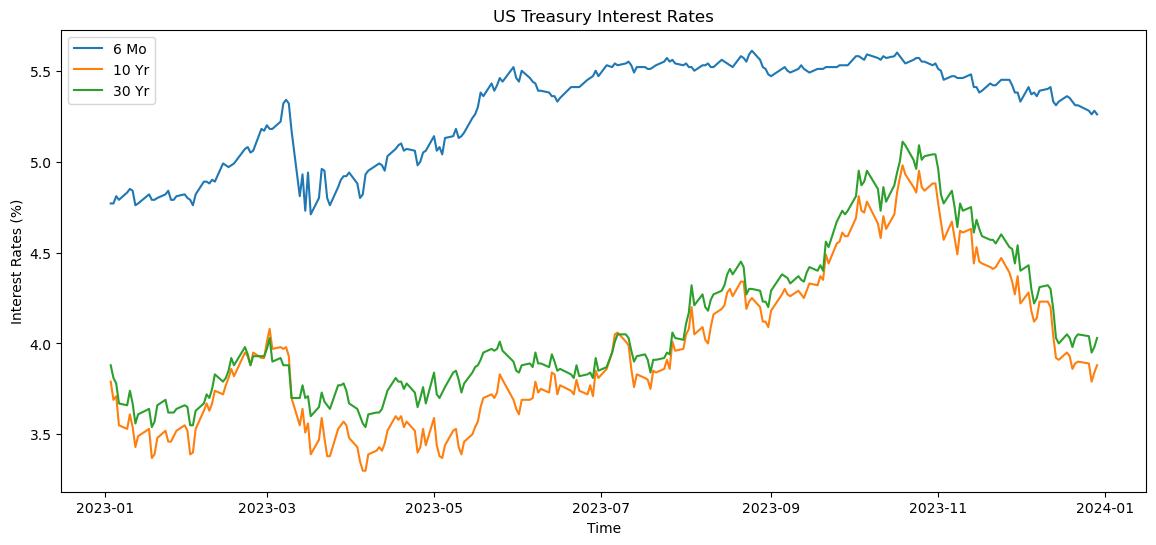

In [95]:
tenors = ['6 Mo', '10 Yr', '30 Yr']

plt.figure(figsize=(14,6))
plt.plot(USTreasuryData[tenors])

plt.title('US Treasury Interest Rates')
plt.xlabel('Time')
plt.ylabel('Interest Rates (%)')
plt.legend(tenors)
plt.show()

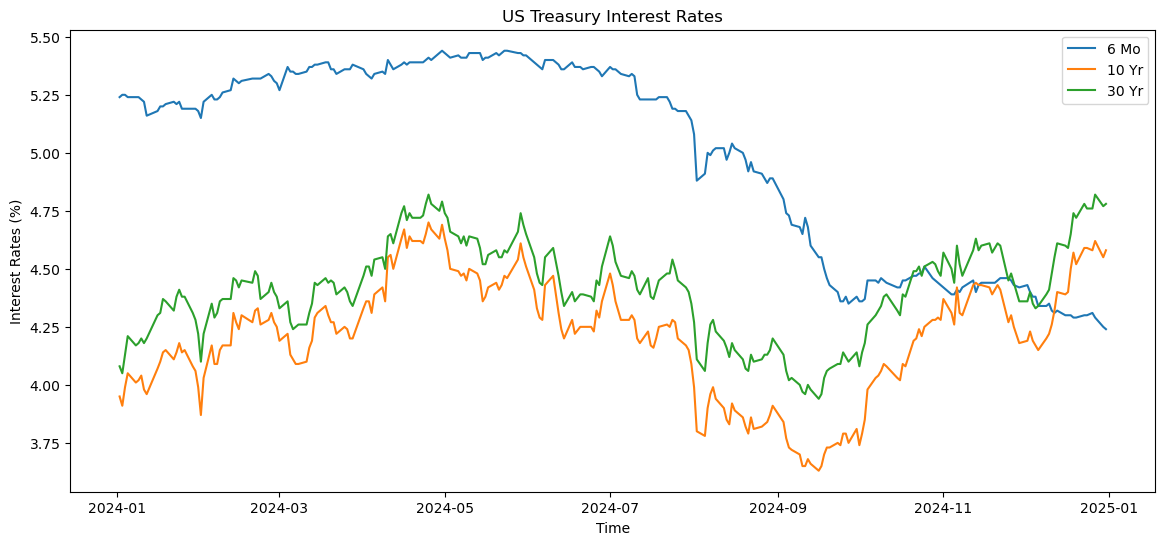

In [99]:
USTreasuryData = InterestRates(Y=2024).USTreasury()
tenors = ['6 Mo', '10 Yr', '30 Yr']

plt.figure(figsize=(14,6))
plt.plot(USTreasuryData[tenors])

plt.title('US Treasury Interest Rates')
plt.xlabel('Time')
plt.ylabel('Interest Rates (%)')
plt.legend(tenors)
plt.show()


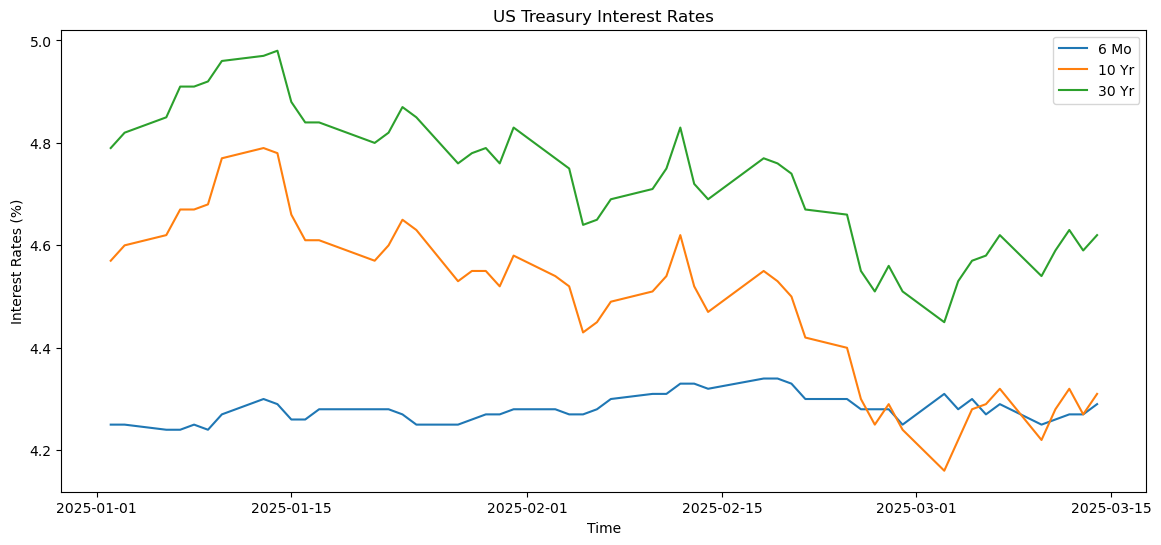

In [101]:
USTreasuryData = InterestRates(Y=2025).USTreasury()
tenors = ['6 Mo', '10 Yr', '30 Yr']

plt.figure(figsize=(14,6))
plt.plot(USTreasuryData[tenors])

plt.title('US Treasury Interest Rates')
plt.xlabel('Time')
plt.ylabel('Interest Rates (%)')
plt.legend(tenors)
plt.show()